Loading default IGoR model from path :  /home/alfaceor/.local/share/igor/models/human/tcr_beta/
Parms filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Margs filename:  /home/alfaceor/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
--------------------------------------------------


<AxesSubplot:>

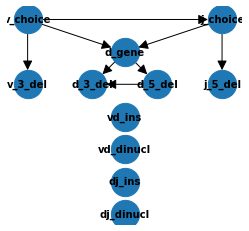

In [1]:
import pygor3 as p3
mdl = p3.IgorModel.load_default("human", "tcr_beta")
mdl.parms.plot_Graph()

In [2]:
strEvent = 'j_choice'

In [4]:
# mdl.generate_Pmarginals_general()
sorted_events = mdl.parms.get_Event_list_sorted()
sorted_events_to_marginalize = [event for event in sorted_events if not event.event_type == "DinucMarkov"]
event_to_marginalize = mdl.parms.get_Event(strEvent)
event_to_eliminate_ordered_list = [event for event in sorted_events_to_marginalize if not
                                   event.nickname == event_to_marginalize.nickname]
mdl.generate_Pmarginals_initial_factors()
print("event_to_marginalize.nickname : ", event_to_marginalize.nickname)
for event_to_eliminate in event_to_eliminate_ordered_list:
    print("-----")
    print("event_to_eliminate : ", event_to_eliminate.nickname)
    mdl.update_factors_by_sum_out_variable(event_to_eliminate.nickname)
    # print(mdl.factors[-1])

event_to_marginalize.nickname :  j_choice
-----
event_to_eliminate :  v_choice
var_to_eliminate:  v_choice
da_sum_over_event.dims :  ('v_choice', 'j_choice', 'd_gene', 'v_3_del')
new_factor.dims :  ('j_choice', 'd_gene', 'v_3_del')
-----
event_to_eliminate :  d_gene
var_to_eliminate:  d_gene
da_sum_over_event.dims :  ('d_gene', 'd_5_del', 'd_3_del', 'j_choice', 'v_3_del')
new_factor.dims :  ('d_5_del', 'd_3_del', 'j_choice', 'v_3_del')
-----
event_to_eliminate :  v_3_del
var_to_eliminate:  v_3_del
da_sum_over_event.dims :  ('d_5_del', 'd_3_del', 'j_choice', 'v_3_del')
new_factor.dims :  ('d_5_del', 'd_3_del', 'j_choice')
-----
event_to_eliminate :  d_5_del
var_to_eliminate:  d_5_del
da_sum_over_event.dims :  ('d_5_del', 'd_3_del', 'j_choice')
new_factor.dims :  ('d_3_del', 'j_choice')
-----
event_to_eliminate :  j_5_del
var_to_eliminate:  j_5_del
da_sum_over_event.dims :  ('j_choice', 'j_5_del')
new_factor.dims :  ('j_choice',)
-----
event_to_eliminate :  d_3_del
var_to_eliminate:  d_3

In [7]:
mdl.factors

4

In [9]:
list(map(lambda x: x.nickname, event_to_eliminate_ordered_list))

['v_choice',
 'd_gene',
 'v_3_del',
 'd_5_del',
 'j_5_del',
 'd_3_del',
 'vd_ins',
 'dj_ins']

<xarray.DataArray (j_choice: 15)>
array([0.11962186, 0.10538077, 0.02016188, 0.05684014, 0.09945672,
       0.03726745, 0.0322361 , 0.12542452, 0.05034454, 0.09853381,
       0.01948227, 0.07500318, 0.0190534 , 0.0709002 , 0.07029376])
Coordinates:
  * j_choice       (j_choice) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    lbl__j_choice  (j_choice) object 'K02545|TRBJ1-1*01|Homo sapiens|F|J-REGI...
    seq__j_choice  (j_choice) object 'TGAACACTGAAGCTTTCTTTGGACAAGGCACCAGACTCA...

In [5]:
Pmarginal = dict()
sorted_events = mdl.parms.get_Event_list_sorted()
sorted_events_to_marginalize = [event for event in sorted_events if not event.event_type == "DinucMarkov"]
print(len(sorted_events_to_marginalize), len(sorted_events))

9 11


In [ ]:
import networkx as nx
nicknames_sorted = list( nx.topological_sort(mdl.parms.G) )
# list(nicknames_sorted)
sorted_events = [mdl.parms.get_Event(nickname) for nickname in nicknames_sorted]
sorted_events

In [ ]:
sorted_events[::-1]

In [ ]:
nicknames_sorted

In [ ]:
Psi_list = list()
for event in sorted_events:
    parents = list(mdl.parms.G.predecessors(event.nickname))
    if len(parents) == 0:
        Pmarginal[event.nickname] = mdl.xdata[event.nickname]
    else:
        print("Aqui es el problema claro")
        # TODO: HERE START VARIABLE ELIMINATION ALGORITHM
        dims_set = set( mdl.xdata[event.nickname].dims )
        factors = list()
            for ev_nick in mdl.xdata:
            intersections = dims_set.intersection(set(mdl.xdata[ev_nick].dims))
            if len(intersections) > 0 :
                #print(intersections)
                factors.append(mdl.xdata[ev_nick])
        print(event.nickname, [ factor.attrs["nickname"] for factor in factors])
#         print("event.nickname : ", event.nickname)
#         print("event.factors : ", factors)

In [ ]:
strEvent = 'v_choice'
tau = get_factor_variable_elimination(mdl, strEvent, nicknames_sorted)
tau

In [ ]:
# Get the factors
# Elimination order
# take a variable to eliminate (strEvent)
# get the factors in the variable and generate a Psi (strEvent)
# return the sumation over the variable to eliminate

# def get_factor_variable_elimination(mdl, event_nickname, order_list_nicknames):
mdl.xdata['vd_dinucl']

In [ ]:
# Make a list of factors
# what should be the correct structure for this
# Give me the factors with the variables A, B, C
# [Phi_A(A), Phi_B(B,A,X), Phi_C(C,X), ... Phi_Z(Z,N)]
# [[A], [B, A, X]]
print(mdl.xdata.keys())
factors = list()
for da in mdl.xdata.values():
    if da.attrs["event_type"] == 'DinucMarkov':
        sarray = da.stack(z=('x', 'y'))
        sarray = sarray.rename({"z": da.attrs["nickname"]})
        # factors.append(sarray)
    else:
        factors.append(da)

# def generate_Pmarginals_initial_factors(self, factors):
#     factors = list()
#     for da in self.xdata.values():
#         if da.attrs["event_type"] == 'DinucMarkov':
#             sarray = da.stack(z=('x', 'y'))
#             sarray = sarray.rename({"z": da.attrs["nickname"]})
#             factors.append(sarray)
#         else:
#             factors.append(da)


In [ ]:
len(factors)

In [ ]:
mdl['dj_ins']

In [ ]:

# def sum_out_variable(var_to_eliminate):

var_to_eliminate = 'dj_dinucl'
factors_to_sum_out = list()
_factors = list()

for factor in factors:
    if factor.attrs["event_type"] == 'DinucMarkov':
        lista = [ factor.attrs["nickname"] ] + factor.attrs["parents"]
        var_intersection = {var_to_eliminate}.intersection(set(lista))
    else:
        var_intersection = {var_to_eliminate}.intersection(set(factor.dims))
        # print(set(factor.dims))
    if len(var_intersection) > 0 :
        # print(var_intersection)
        factors_to_sum_out.append(factor)
    else:
        _factors.append(factor)

# sum-out-variables
da_sum_over_event = 1
print("factors_to_sum_out : ", len(factors_to_sum_out))
for factor in factors_to_sum_out:
    da_sum_over_event = da_sum_over_event*factor

print(da_sum_over_event)

_factors.append(da_sum_over_event.sum(dim=var_to_eliminate))
factors = _factors


In [ ]:
print(len(factors), factors[-1])
# sum_out_variable('dj_dinucl')
# print(len(factors), factors[-1])

In [ ]:
sarray = array.stack(z=('x', 'y'))
sarray.rename({"z":"vd_dinucl"})

In [ ]:
#factors

In [ ]:
#factors_to_sum_out

In [48]:
import numpy as np
import xarray as xr
xx=list(range(4))
yy=list(range(3))
zz=list(range(2))
ss=list(range(2))
ww=list(range(2))

da_1 = xr.DataArray(
    np.random.random((len(xx), len(yy), len(zz))), 
    coords=[xx, yy, zz], dims=['x', 'y', 'z']
)

da_2 = xr.DataArray(
    np.random.random((len(xx), len(ss))),
    coords=[xx, ss], dims=['x', 's']
)
arr_3 = np.random.random(len(ww))
arr_3 = arr_3/arr_3.sum()
da_3 = xr.DataArray(
    arr_3,
    coords=[ww], dims=['w']
)

In [49]:
da_3

<xarray.DataArray (w: 2)>
array([0.56095322, 0.43904678])
Coordinates:
  * w        (w) int64 0 1

In [51]:
da_1

<xarray.DataArray (x: 4, y: 3, z: 2)>
array([[[0.49631577, 0.73454874],
        [0.82163076, 0.61074096],
        [0.85432104, 0.00273419]],

       [[0.47680176, 0.25231292],
        [0.25207709, 0.37329452],
        [0.92414314, 0.21613017]],

       [[0.64893075, 0.62273843],
        [0.78002711, 0.4072341 ],
        [0.91439889, 0.64323832]],

       [[0.32755224, 0.42888497],
        [0.03024432, 0.78585627],
        [0.41577351, 0.31442499]]])
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 0 1 2
  * z        (z) int64 0 1

In [52]:
(da_1*da_3).sum(dim='w')

<xarray.DataArray (x: 4, y: 3, z: 2)>
array([[[0.49631577, 0.73454874],
        [0.82163076, 0.61074096],
        [0.85432104, 0.00273419]],

       [[0.47680176, 0.25231292],
        [0.25207709, 0.37329452],
        [0.92414314, 0.21613017]],

       [[0.64893075, 0.62273843],
        [0.78002711, 0.4072341 ],
        [0.91439889, 0.64323832]],

       [[0.32755224, 0.42888497],
        [0.03024432, 0.78585627],
        [0.41577351, 0.31442499]]])
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 0 1 2
  * z        (z) int64 0 1

In [16]:
da_v*da_j

<xarray.DataArray (v_choice: 3, j_choice: 2)>
array([[0.17409332, 0.06006185],
       [0.12208821, 0.68954972],
       [0.30228118, 0.25862621]])
Coordinates:
  * v_choice  (v_choice) int64 0 1 2
  * j_choice  (j_choice) int64 0 1

In [17]:
da_j*da_v

<xarray.DataArray (v_choice: 3, j_choice: 2)>
array([[0.17409332, 0.06006185],
       [0.12208821, 0.68954972],
       [0.30228118, 0.25862621]])
Coordinates:
  * v_choice  (v_choice) int64 0 1 2
  * j_choice  (j_choice) int64 0 1

In [18]:
da_v.dot(da_j)

<xarray.DataArray (j_choice: 2)>
array([0.59846272, 1.00823778])
Coordinates:
  * j_choice  (j_choice) int64 0 1

In [19]:
da_j.dot(da_v)

<xarray.DataArray (j_choice: 2)>
array([0.59846272, 1.00823778])
Coordinates:
  * j_choice  (j_choice) int64 0 1

In [ ]:
# import numpy as np
# v_genlabel = np.vectorize(p3.genLabel)
p3.v_genLabel( mdl.Pmarginal['j_choice']['lbl__j_choice'] )

In [ ]:
str_event_nickname="d_gene"
print(type({str_event_nickname}))
set(mdl[str_event_nickname].attrs["parents"])

In [ ]:
import networkx as nx
# mdl[str_event_nickname].attrs["parents"]
# mdl.parms.G
str_event_nickname01 = "v_choice"
str_event_nickname02 = "j_choice"
nx.d_separated(mdl.parms.G, {str_event_nickname01}, {str_event_nickname02}, {})

In [ ]:
aa = nx.topological_sort(mdl.parms.G)

In [ ]:
print(list(aa))

In [ ]:
Pmarginal=dict()
roots = [n for n,d in mdl.parms.G.in_degree() if d==0]
topo_sort_events = list(nx.topological_sort(mdl.parms.G))
events_to_process = topo_sort_events.copy()
print(events_to_process)

In [ ]:
Pmarginal=dict()
roots = [n for n,d in mdl.parms.G.in_degree() if d==0]
topo_sort_events = list(nx.topological_sort(mdl.parms.G))
events_to_process = topo_sort_events.copy()
print("events_to_process : ", events_to_process)
for event_nickname in nx.topological_sort(mdl.parms.G):
    if event_nickname in roots:
        Pmarginal[event_nickname] = mdl[event_nickname]
        events_to_process.remove(event_nickname)
    else:
        # calculate marginals
        event_parents = list(mdl.parms.G.predecessors(event_nickname))
        aaa = [ event for event in topo_sort_events if event in event_parents]
        print(event_nickname, aaa)

In [ ]:
events_to_process

In [ ]:
aaa = [ event for event in topo_sort_events if event in event_parents]

In [ ]:
import networkx as nx
ev_nickname01='v_choice'
ev_nickname02='d_3_del'
for path in nx.all_simple_paths(mdl.parms.G, source=ev_nickname01, target=ev_nickname02):
    print("="*5, path)
    for node in path[1:-1]:
        print(node)
        parents = mdl.parms.G.predecessors(node)
        print(list(parents))
    print("-"*5)
